# Document Containing Code For Imports, textual Cleaning Functions, Document Length, Word Frequencies, Outlier Detection and Term Frequency Inverse Document Frequency

# Load Imports

In [115]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import itertools
from operator import itemgetter, attrgetter
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import string
import matplotlib as mpl
import pandas as pd
import sklearn.manifold as skmf
import jiwer
from jiwer import transforms
from num2words import num2words
import re
import nltk
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords",quiet=True)
nltk.download('punkt',quiet=True)
nltk.download('wordnet',quiet=True)
nltk.download('omw-1.4',quiet=True)

True

In [116]:
#pip install num2words

# Load Data - View Data Format

In [118]:
nova

,text
0,Mrs. Palmer is a 62 year old female presenting...
1,"Hi, doctor Rollins. I just saw miss Palmer in ..."
2,"Today with shortness of breath and, fatigue. S..."
3,"Mister Leslie Palmer, who is a 62 year old mal..."
4,Good morning. Miss Palmer is a 60 year old 62 ...
...,...
149,2 year old male presents to the emergency depa...
150,She's a 62 year old female who presents to the...
151,Missus Leslie is a 62 year old female patient ...
152,So I just met with Leslie Palmer. She is a 62 ...


In [119]:
whisper

,text
0,Mrs. Palmer is a 62-year-old female presentin...
1,"Hi, Dr. Rollins. I just saw Ms. Palmer in roo..."
2,She is 62 years old and presented to the emer...
3,"Mr. Leslie Palmer, who is a 62-year-old male,..."
4,Good morning. Ms. Palmer is a 62-year-old fem...
...,...
149,year old male presents to the emergency depar...
150,She's a 62-year-old female who presents to th...
151,Mrs. Leslie is a 62-year-old female patient w...
152,So I just met with Leslie Palmer. She is a 62...


In [120]:
true

,Transcription
0,Ms. Palmer is a 62-year-old female presenting ...
1,"Hi Dr. Rawlins, I just saw Ms. Palmer in room ..."
2,Presented um today with shortness of breath an...
3,Mr. Leslie Pal Palmer who is a 62 year old mal...
4,Good morning. Ms. Palmer is a 60 year old 62 y...
...,...
149,2 year-old male presents to the emergency depa...
150,She is a 62 Year-old female who presents to th...
151,Mrs. Leslie is a 62 year old female patient wi...
152,So I just met with Leslie Palmer. She’s a 62 y...


In [121]:
#pip install jiwer

# Textual Cleaning Function

In [122]:
def text_clean(x):
    clean_text = []
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    for i in x:
        t=jiwer.ExpandCommonEnglishContractions()(i)
        t=jiwer.RemoveEmptyStrings()(t)
        t=jiwer.ToLowerCase()(t)
        t=jiwer.RemoveKaldiNonWords()(t)
        t= t.translate(translator)
        t=jiwer.Strip()(t)
        t=jiwer.SubstituteWords({"1+": "one plus",
                                 "1 +": "one plus",
                                 "2 d" :'2d',
                                 "o two": "oxygen saturation", 
                                 "o2": "oxygen saturation",
                                 'mg': "milligrams",
                                 "hr": "heart rate", 
                                 "rr": "respiratory rate", 
                                 "bp": "blood pressure",
                                 'x-ray': 'xray',
                                 "x ray": "xray", 
                                 "ms": "missus",
                                 'miss':'missus',
                                 "mrs": "missus",
                                 '/': 'over',
                                 '%': 'percent',
                                 "hrs": "hours", 
                                 "wks": "weeks", 
                                 "mths": "months",
                                 'mos': 'months',
                                 'mr': 'mister',
                                 'rollins': 'rawlins',
                                 'dr': 'doctor',
                                 'cr td':'crtd',
                                 's 4': 's4',
                                 's four':'sfour',
                                 's two':'stwo',
                                 's 2': 's2',
                                 's three': ' sthree',
                                 's 3': 's3',
                                 ' v one':'vone',
                                 'v 1': 'v1',
                                 't 4':'t4',
                                 't four':'tfour',
                                 't 6':'t6',
                                 't six':'tsix',
                                 'nn':'',
                                 'nnn':'',
                                 'uh': '',
                                 'um': '',
                                 'uhh':'',
                                 'uhhh': '',
                                 'ummm': '',
                                 'umm': '',
                                })(t)
        t=jiwer.RemovePunctuation()(t)
        t=jiwer.RemoveMultipleSpaces()(t)
        clean_text.append(t)
    return clean_text

In [123]:
def rales(x):
    clean_text = []
    for i in x:
        t= jiwer.SubstituteWords({"rails": "rales","rail": "rale"})(i)
        clean_text.append(t)
    return clean_text

In [124]:
def num_text(x):
    t = [re.sub('(\d+)', lambda m: num2words(m.group()), sentence) for sentence in x]
    return t #convert numerical numbers in text to word format

In [125]:
def bag_of_words(X):
    bag=""
    for i in X:
        bag = bag + " " + i
    return bag #takes all entries and creates a single document of all words used (repeats included) 

In [126]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts #counts word frequencies

In [127]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [128]:
nova['clean']=text_clean(nova['text']) #apply cleaning functions
whisper['clean']=text_clean(whisper['text'])
true['clean']=text_clean(true['Transcription'])
true['clean']=rales(true['clean'])
true['clean'] = true['clean'].replace(u'\xa0', u'', regex=True)

In [129]:
nova['all text']=num_text(nova['clean']) #apply num_text function
whisper['all text']=num_text(whisper['clean'])
true['all text']=num_text(true['clean'])


In [130]:
true['all text'][4]

'good morning missus palmer is a sixty year old sixty-two year old female presenting to us with shortness of breath patient states that they are physical physically active and exe exercise routinely they started developing difficulty breathing when exercising this encounter occurred prior to our visit several weeks ago and has had a gradual onset patient states that they feel short of breath when exercising and describes it as its isolated only to the chest is aggravated when exercising and relieved by stopping and by stopping physical activity patient has a prior history of cardiac catheterization and currently presents to us with a previous history of hypertension patient states they do not have any known allergies patient follows a balanced diet does not consume alcohol tobacco or any illicit drugs the patient drinks coffee in the mornings and family history consist of the mother passing away suddenly without reason and father passing away from myocardial infarction at the age of fi

In [131]:
nova['all text'][4]

'good morning missus palmer is a sixty year old sixty-two year old female presenting to us with shortness of breath patient states that they are physical physically active and exercise routinely but started developing difficulty breathing when exercising this encounter occurred prior to our visit several weeks ago and has had a gradual onset patient states that they feel short of breath when exercising and describes it as it is isolated only to the chest it is aggravated when exercising and relieved by stopping and by stopping physical activity patient has a prior history of cardiac catheterization and currently presents to us with a previous history of hypertension patient states do not have any known allergies patient follows a balanced diet does not consume alcohol tobacco or any illicit drugs a patient drinks coffee in the mornings and family history consists of the mother passing away suddenly without reason and father passing away from myocardial infarction at the age of fifty-ni

In [132]:
whisper['all text'][4]

'good morning missus palmer is a sixty-two year old female presenting to us with shortness of breath patient states that they are physically active and exercise routinely but started developing difficulty breathing when exercising this encounter occurred prior to our visit several weeks ago and has had a gradual onset patient states that they feel short of breath when exercising and describes it as it is isolated only to the chest it is aggravated when exercising and will leave by stopping physical activity patient has a prior history of cardiac catheterization and currently presents to us with a previous history of hypertension patient states do not have any known allergies patient follows a balanced diet does not consume alcohol tobacco or any illicit drugs the patient drinks coffee in the mornings and family history the patient is mother passed away suddenly without reason and the father passed away from a myocardial infarction at the age of fifty-nine missus palmer is fatigued repo

In [133]:
#load stop words, omit certain stop words for medical relevance
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.remove('most')
stop.remove('some')
stop.remove('out')

# Overview of Deepgram Nova-2

In [134]:
#all words including stop words
bag_nova=bag_of_words(nova['all text'])
len(bag_nova)

496772

In [135]:
#remove stop words(i.e typical filler words) (want to capture words of significance)
nova['no stop words'] = nova['all text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
stop_bag_nova=bag_of_words(nova['no stop words'])
len(stop_bag_nova)

357966

In [136]:

nlp_words_nova=sorted(word_count(bag_nova).items(),key=itemgetter(1),reverse=True) # repeated words ommited 
print("Nova-2 Number of Unique Words")
print(len(nlp_words_nova))

Nova-2 Number of Unique Words
3199


In [137]:
stop_nlp_words_nova=sorted(word_count(stop_bag_nova).items(),key=itemgetter(1),reverse=True)
print("Nova-2 Number of Unique Words (Common Words removed)")
print(len(stop_nlp_words_nova))

Nova-2 Number of Unique Words (Common Words removed)
3081


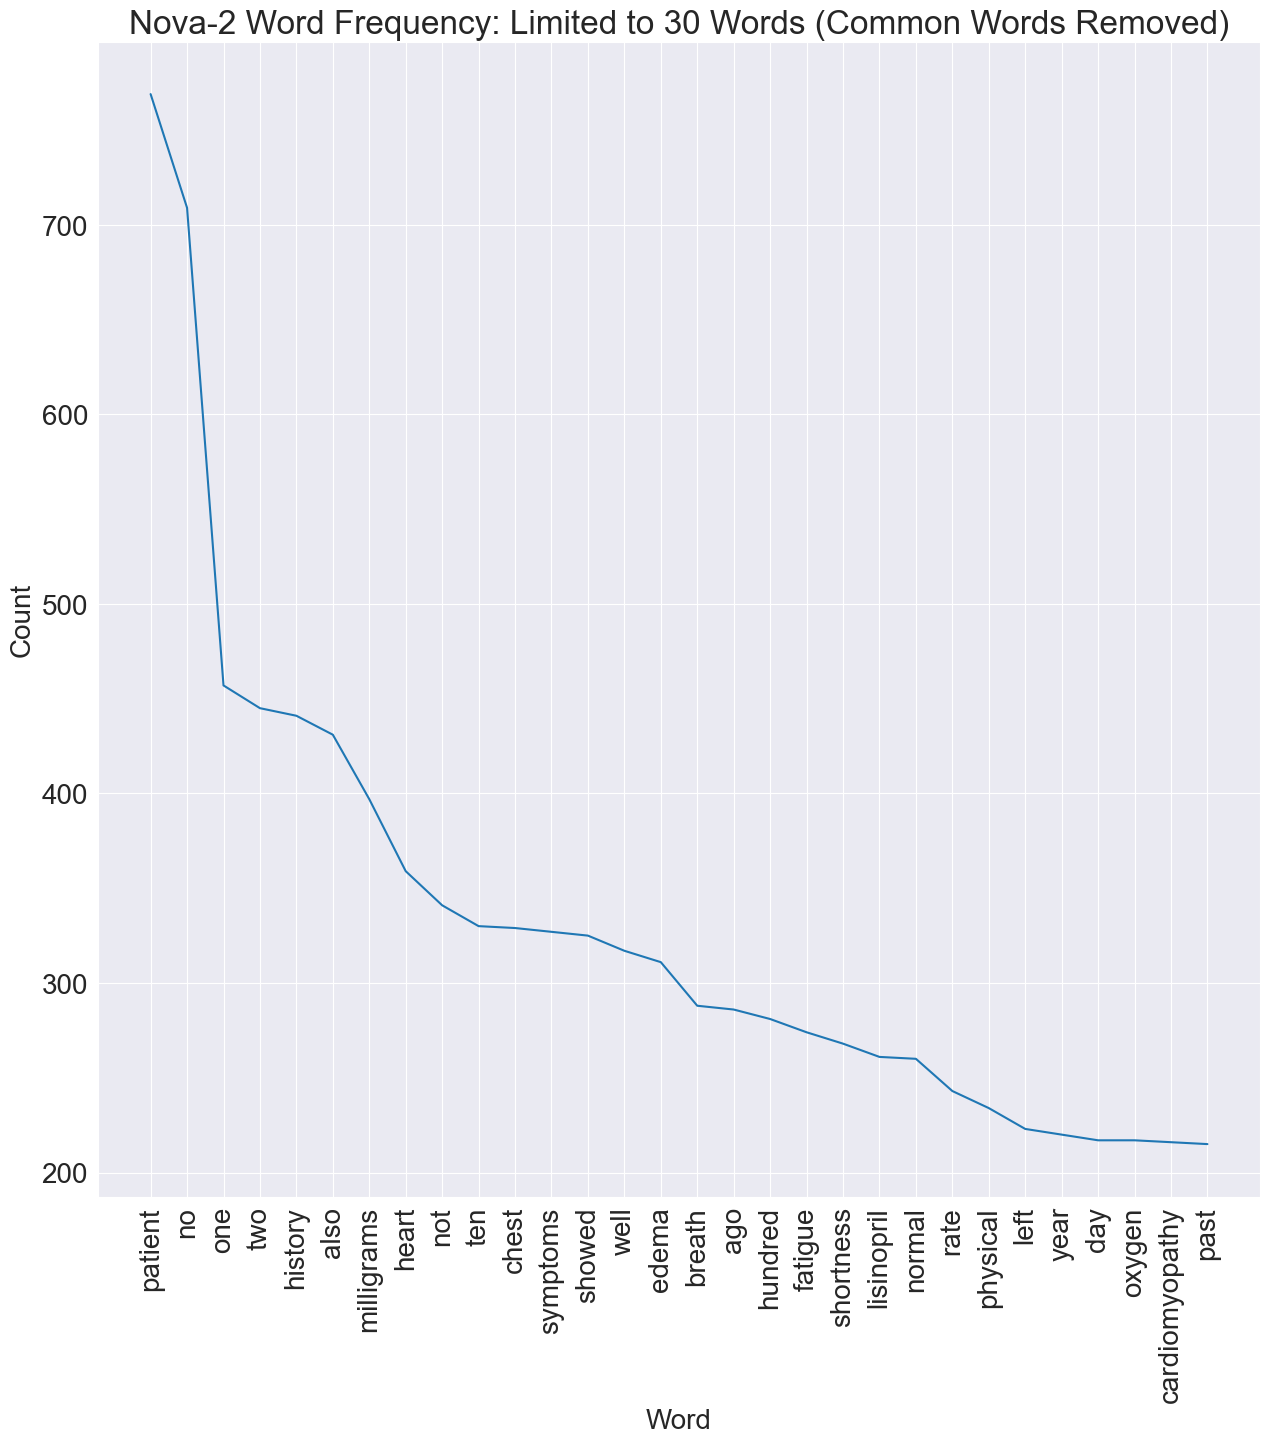

In [138]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size':20})
sns.set_style('darkgrid')
x,y = zip(*stop_nlp_words_nova)
plt.plot(x[0:30],y[0:30])
plt.title('Nova-2 Word Frequency: Limited to 30 Words (Common Words Removed)'), 
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [139]:
nova['doc_len'] = nova['all text'].apply(lambda i: len(i.split()))

In [140]:
nova['doc_len']

0      207
1      562
2      607
3      328
4      394
      ... 
149    479
150    624
151    893
152    558
153    480
Name: doc_len, Length: 154, dtype: int64

557 162


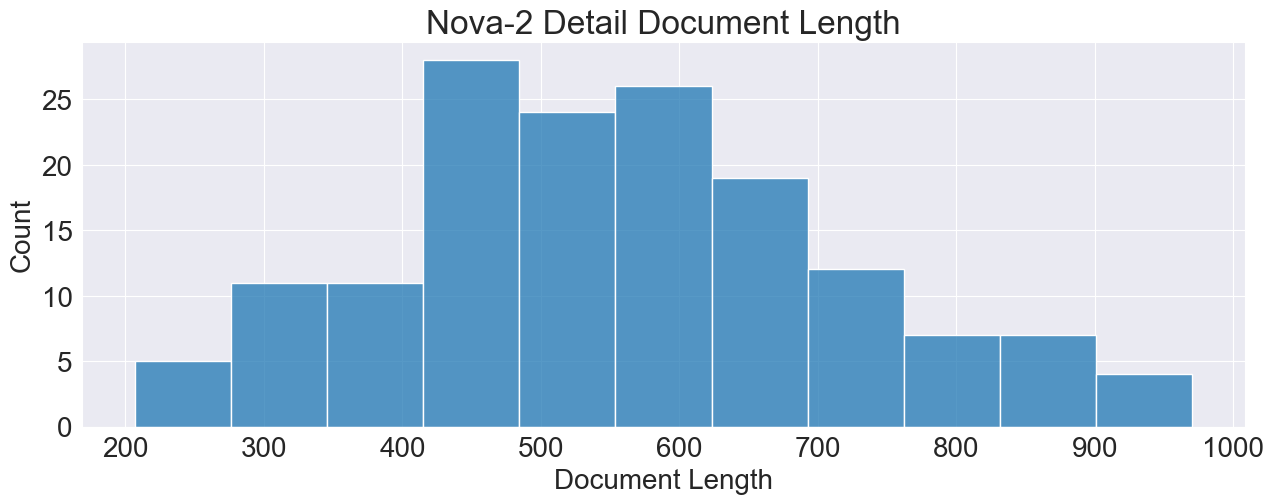

In [141]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(nova['doc_len']).set(title='Nova-2 Detail Document Length', xlabel='Document Length', ylabel='Count')
print(round(np.mean(nova['doc_len'])),round(np.std(nova['doc_len'])))

In [142]:
outliers=find_outliers_IQR(nova['doc_len'])
outliers

17    970
Name: doc_len, dtype: int64

In [187]:
nova['all text'][17]

'a sixty-two year old patient male patient presented to the clinic today with shortness of breath and fatigue in the history of the illness the patient stated that the that he was on a track on a run or on a walk and then experienced a shortness of breath and fatigue as well as palpitations while he was walking his with his friends the patient mentioned that there was that he experienced palpitations within the next twenty minutes upon the onset of the shortness of breath this event occurred a couple weeks ago and has not improved ever since and the patient is shortness of breath and palpitations as well as fatigue exacerbated with physical activity in terms of the review systems patient experienced fatigue no cough fever malaise or any kind of illness or any kind of cold like symptoms but experienced weight gain for the past couple of weeks patient mentioned that there was palpitations but no chest pain along with the palpitations patient experienced dyspnea and raspy breathing in ter

# Overview of Whisper V3 Transcriptions

In [143]:
bag_whisper=bag_of_words(whisper['all text'])
len(bag_whisper)

521263

In [144]:
nlp_words_whisper=sorted(word_count(bag_whisper).items(),key=itemgetter(1),reverse=True)
print("Whisper Number of Unique Words")
print(len(nlp_words_whisper))

Whisper Number of Unique Words
3921


In [145]:
#remove stop words(i.e typical filler words) (want to capture words of significance)
whisper['no stop words'] = whisper['all text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
stop_bag_whisper=bag_of_words(whisper['no stop words'])
len(stop_bag_whisper)

373317

In [146]:
stop_nlp_words_whisper=sorted(word_count(stop_bag_whisper).items(),key=itemgetter(1),reverse=True)
print("Whisper Number of Unique Words (Common Words Removed)")
print(len(stop_nlp_words_whisper))

Whisper Number of Unique Words (Common Words Removed)
3801


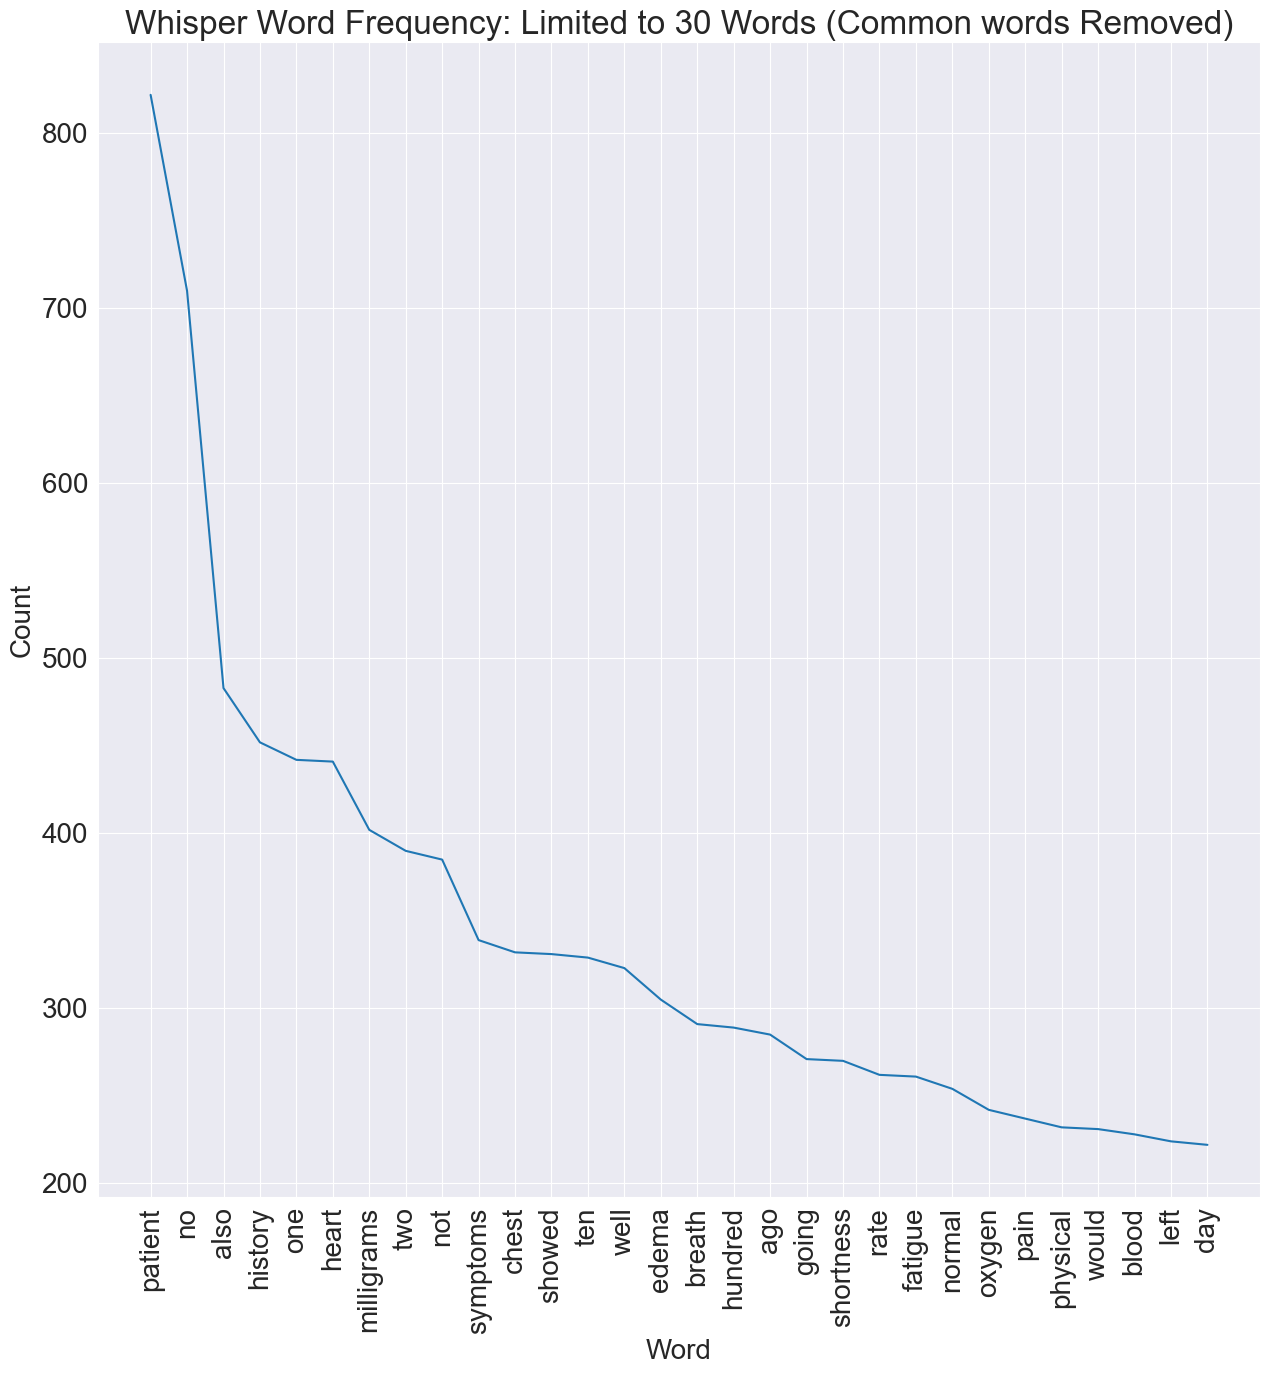

In [147]:

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size':20})
sns.set_style('darkgrid')
x,y = zip(*stop_nlp_words_whisper)
plt.plot(x[0:30],y[0:30])
plt.title('Whisper Word Frequency: Limited to 30 Words (Common words Removed)'), 
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [148]:
whisper['doc_len'] = whisper['all text'].apply(lambda i: len(i.split()))

589 179


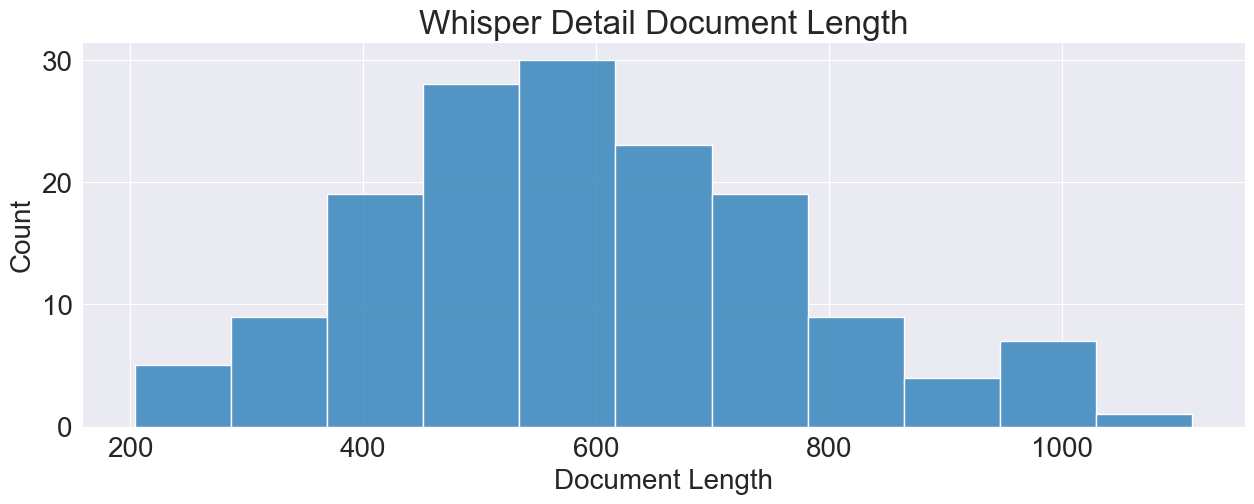

In [149]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(whisper['doc_len']).set(title='Whisper Detail Document Length', xlabel='Document Length', ylabel='Count')
print(round(np.mean(whisper['doc_len'])),round(np.std(whisper['doc_len'])))

In [150]:
outliers=find_outliers_IQR(whisper['doc_len'])
outliers

131    1112
Name: doc_len, dtype: int64

In [186]:
whisper['all text'][131]

'to you today so i had just finished seeing missus palmer she is a sixty-two year old woman who presents to the emergency department today with complaints of cough shortness excuse me with complaints of shortness of breath chest pain and fatigue she claims that a couple of few days ago she had a viral infection for which she had cough she had fever and just general malaise she saw her primary care physician for which she says that the symptoms resolved except for her shortness of breath and fatigue and currently she is experiencing chest pain as of now she does not have a fever but she does have shortness of breath and fatigue when i asked her what aggravates the shortness of breath she says that any daily activities like walking around really makes her feel the shortness of breath and fatigue but sitting in a reclined seat so like sitting in her recliner alleviates her symptoms she also describes the chest pain as just dull chest pain when i asked her about her past medical history sh

#  Overview of the True Transcriptions

In [151]:
bag_true=bag_of_words(true['all text'])
len(bag_true)

494936

In [152]:
nlp_words_true=sorted(word_count(bag_true).items(),key=itemgetter(1),reverse=True)
print("True Number of Unique Words")
print(len(nlp_words_true))

True Number of Unique Words
2884


In [153]:
true['no stop words'] = true['all text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
stop_bag_true=bag_of_words(true['no stop words'])
len(stop_bag_true)

359136

In [154]:
stop_nlp_words_true=sorted(word_count(stop_bag_true).items(),key=itemgetter(1),reverse=True)
print("True Number of Unique Words (Common Words Removed)")
print(len(stop_nlp_words_true))

True Number of Unique Words (Common Words Removed)
2770


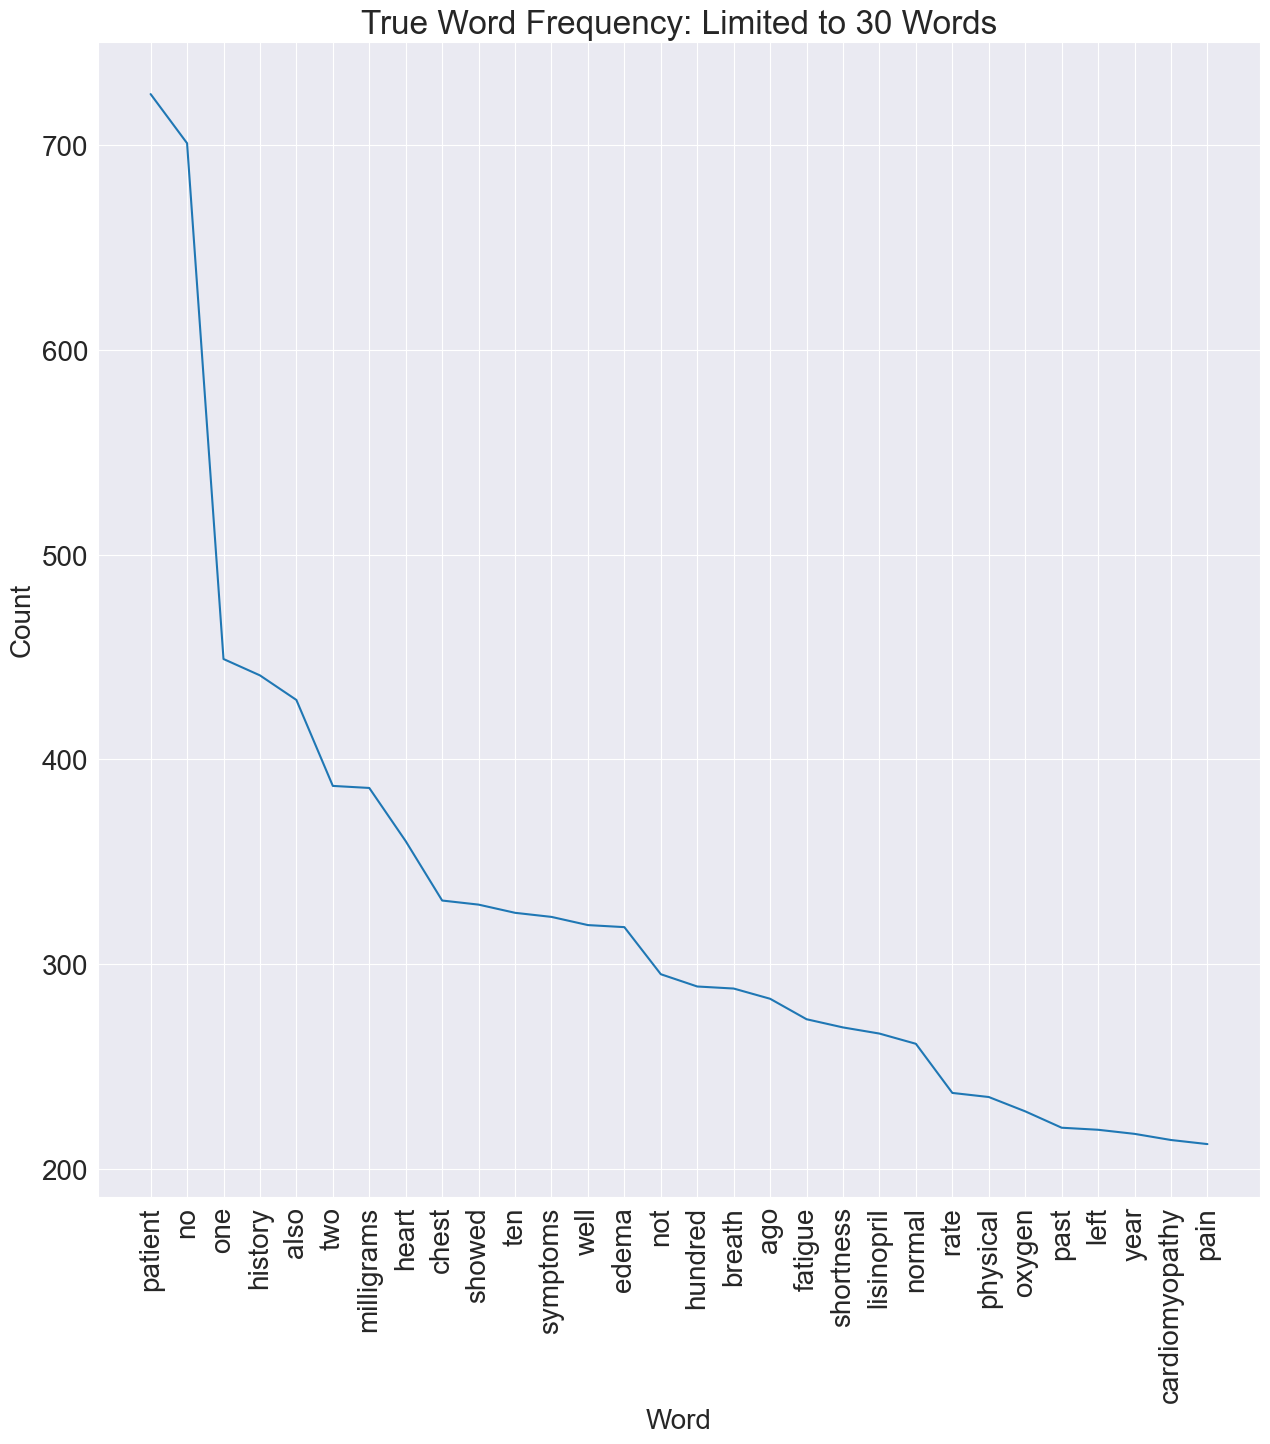

In [155]:

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size':20})
sns.set_style('darkgrid')
x,y = zip(*stop_nlp_words_true)
plt.plot(x[0:30],y[0:30])
plt.title('True Word Frequency: Limited to 30 Words'), 
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [156]:
true['doc_len'] = true['all text'].apply(lambda i: len(i.split()))

552 158


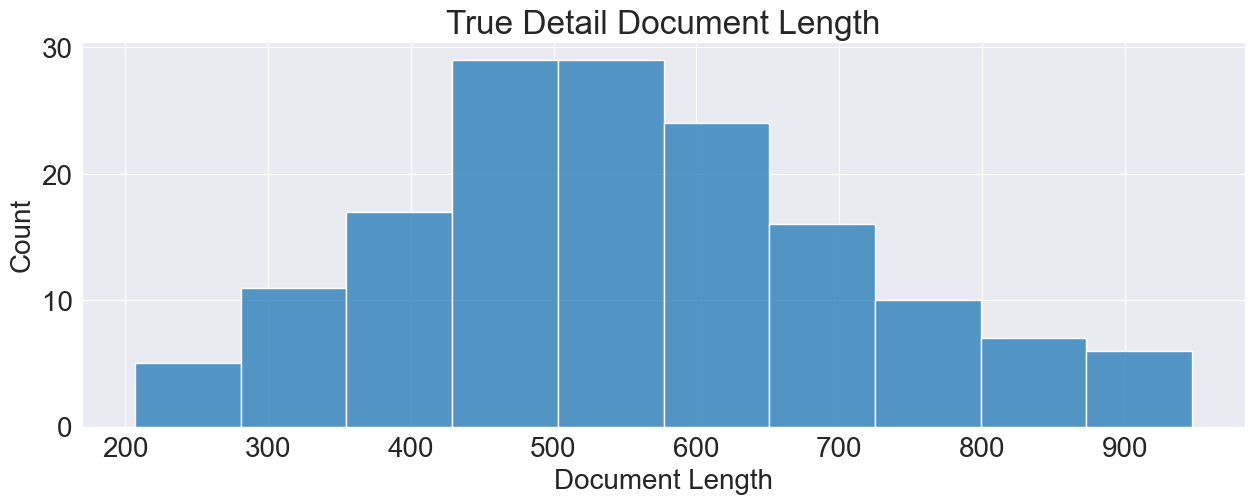

In [157]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(true['doc_len']).set(title='True Detail Document Length', xlabel='Document Length', ylabel='Count')
print(round(np.mean(true['doc_len'])),round(np.std(true['doc_len'])))

In [158]:
outliers=find_outliers_IQR(true['doc_len'])
outliers

Series([], Name: doc_len, dtype: int64)

# Term Frequency Inverse Document Frequency (TFIDF) Analysis

In [159]:
tfidvec = TfidfVectorizer(min_df = 2,
                          max_df = 0.95,
                          norm = 'l2',
                          stop_words = stop)
TFIDF_nova = tfidvec.fit_transform(nova['all text'])
TFIDF_whisper = tfidvec.fit_transform(whisper['all text'])
TFIDF_true = tfidvec.fit_transform(true['all text'])


In [160]:
TFIDF_nova
#tfidf_tokens = tfidvec.get_feature_names_out()
#len(tfidf_tokens)

<154x1749 sparse matrix of type '<class 'numpy.float64'>'
	with 32889 stored elements in Compressed Sparse Row format>

In [161]:
TFIDF_whisper
#len(tfidf_tokens)

<154x1835 sparse matrix of type '<class 'numpy.float64'>'
	with 33171 stored elements in Compressed Sparse Row format>

In [162]:
TFIDF_true
#len(tfidf_tokens)

<154x1716 sparse matrix of type '<class 'numpy.float64'>'
	with 33489 stored elements in Compressed Sparse Row format>

# Manual Calculation of TFIDF - Using the text with stop words removed.

# Deepgram Nova-2

In [163]:
nova['no stop words']

0      missus palmer sixty-two year old female presen...
1      hi doctor rawlins saw missus palmer room six s...
2      today shortness breath fatigue sixty-two years...
3      mister leslie palmer sixty-two year old male p...
4      good morning missus palmer sixty year old sixt...
                             ...                        
149    two year old male presents emergency departmen...
150    sixty-two year old female presents office toda...
151    missus leslie sixty-two year old female patien...
152    met leslie palmer sixty-two year old female hi...
153    palmer patient presents shortness breath fatig...
Name: no stop words, Length: 154, dtype: object

In [164]:
# Deepgram Nova-2 First
u=nova['no stop words'].aggregate(''.join)
u=u.apply(lambda x:
         [e for e in x.split()])
TF=u.apply(lambda bag: pd.Series(bag).value_counts())
IDF=np.log(float(len(TF))/TF.count())
TFIDF=TF*IDF
TFIDF=TFIDF.fillna(0.0)
TFIDF
l=TFIDF.sum()
l=l.sort_values(ascending=False)
print(np.mean(l), np.std(l),len(l))
f=l.iloc[0:50]
e=l.iloc[50:]
#print(f)
#print(l.iloc[700:])
plt.figure(figsize=(20, 20), dpi=80)

#plt.hist(l,data=1 bins=np.arange(l.min(), l.max()+1))
topTerm=pd.DataFrame({'Words': TFIDF.idxmax(axis=1),'TFIDF':TFIDF.max(axis=1)},columns=['Words','TFIDF'])
topTerm=topTerm.sort_values(by="TFIDF",ascending=False)
#topTerm
#f
#e
ld = pd.DataFrame(data=l).reset_index()
ld

20.526174443006685 22.268464549854055 3081


,index,0
0,patient,198.270585
1,some,164.462489
2,gonna,164.238004
3,sarcoidosis,155.329675
4,would,150.974827
...,...,...
3076,processed,5.036953
3077,reserved,5.036953
3078,dis,5.036953
3079,revere,5.036953


<Figure size 1600x1600 with 0 Axes>

In [165]:
topTerm

,Words,TFIDF
43,terms,35.968429
44,far,31.701094
17,terms,31.172639
34,mgs,27.568382
20,mgs,27.568382
...,...,...
113,flow,5.036953
108,definitive,5.036953
51,raise,5.036953
0,infiltrated,5.036953


Mean is = 11.088992 
Standard Deviation is = 5.610603 
Max is = 35.968429 
Min is = 4.343805 


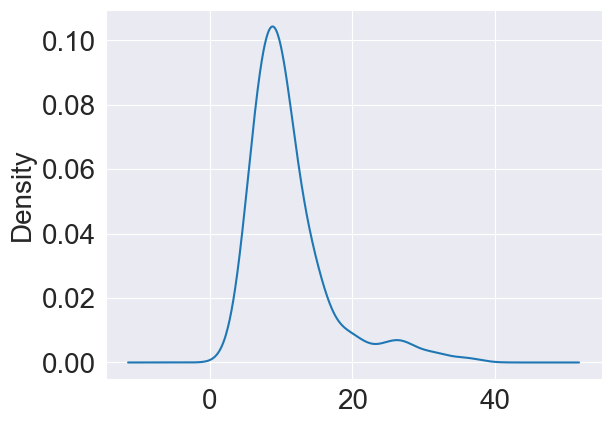

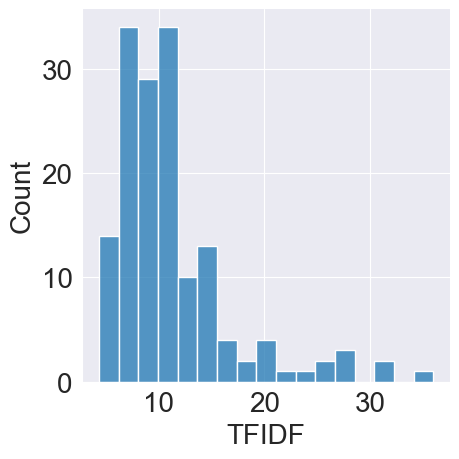

In [166]:
import seaborn
print("Mean is = %f " % np.mean(topTerm['TFIDF']))
print("Standard Deviation is = %f " % np.std(topTerm['TFIDF']))
print("Max is = %f " % np.max(topTerm['TFIDF']))
print("Min is = %f " % np.min(topTerm['TFIDF']))
plt.figure()
u = topTerm['TFIDF'].plot.kde()
u=seaborn.displot(x=topTerm['TFIDF'])

In [167]:
topTerm[topTerm['TFIDF'] > (np.mean(topTerm['TFIDF'])+1.5*np.std(topTerm['TFIDF']))].sort_values(by='TFIDF',ascending=False)

,Words,TFIDF
43,terms,35.968429
44,far,31.701094
17,terms,31.172639
34,mgs,27.568382
20,mgs,27.568382
97,decided,27.192036
140,regards,25.961545
109,poqd,25.184763
130,noted,24.721037
121,far,22.643639


In [168]:
topTerm[topTerm['TFIDF'] < (np.mean(topTerm['TFIDF'])-np.std(topTerm['TFIDF']))].sort_values(by='TFIDF',ascending=False)

,Words,TFIDF
106,looked,5.468735
141,ambulation,5.036953
113,flow,5.036953
108,definitive,5.036953
51,raise,5.036953
0,infiltrated,5.036953
67,plenty,4.343805


In [169]:
TF

,prednisone,palpitations,past,current,sarcoidosis,syncope,lisinopril,father,myocardial,missus,...,gasping,posts,kipnick,fractional,implant,dasopyramide,clobasopril,autoimmuneizations,impulses,allergen
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,NaN,NaN,3.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.0,NaN,NaN,NaN,1.0,2.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


# Whisper V3

In [170]:
whisper['no stop words']

0      missus palmer sixty-two year old female presen...
1      hi doctor rawlins saw missus palmer room six s...
2      sixty-two years old presented emergency room s...
3      mister leslie palmer sixty-two year old male p...
4      good morning missus palmer sixty-two year old ...
                             ...                        
149    year old male presents emergency department co...
150    sixty-two year old female presents office toda...
151    missus leslie sixty-two year old female patien...
152    met leslie palmer sixty-two year old female hi...
153    leslie palmer patient presents shortness breat...
Name: no stop words, Length: 154, dtype: object

In [171]:

u=whisper['no stop words'].aggregate(''.join)
u=u.apply(lambda x:
         [e for e in x.split()])
TF=u.apply(lambda bag: pd.Series(bag).value_counts())
IDF=np.log(float(len(TF))/TF.count())
TFIDF=TF*IDF
TFIDF=TFIDF.fillna(0.0)
TFIDF
l=TFIDF.sum()
l=l.sort_values(ascending=False)
print(np.mean(l), np.std(l),len(l))
f=l.iloc[0:50]
e=l.iloc[50:]
#print(f)
#print(l.iloc[700:])
plt.figure(figsize=(20, 20), dpi=80)

#plt.hist(l,data=1 bins=np.arange(l.min(), l.max()+1))
topTerm=pd.DataFrame({'Words': TFIDF.idxmax(axis=1),'TFIDF':TFIDF.max(axis=1)},columns=['Words','TFIDF'])
topTerm=topTerm.sort_values(by="TFIDF",ascending=False)
#topTerm
#f
#e
ld = pd.DataFrame(data=l).reset_index()
ld

18.319411038290635 22.059719937238643 3801


,index,0
0,patient,211.935528
1,going,184.346063
2,omm,173.286974
3,some,167.620252
4,would,163.136650
...,...,...
3796,evolved,5.036953
3797,leans,5.036953
3798,wrong,5.036953
3799,worried,5.036953


<Figure size 1600x1600 with 0 Axes>

In [172]:
topTerm

,Words,TFIDF
54,omm,165.410293
43,terms,36.229822
120,bit,35.572732
140,regards,32.451931
130,noted,31.975541
...,...,...
113,qtwelve,5.036953
108,definitive,5.036953
67,sulxonate,5.036953
59,appearhol,5.036953


Mean is = 13.791300 
Standard Deviation is = 13.802483 
Max is = 165.410293 
Min is = 5.036953 


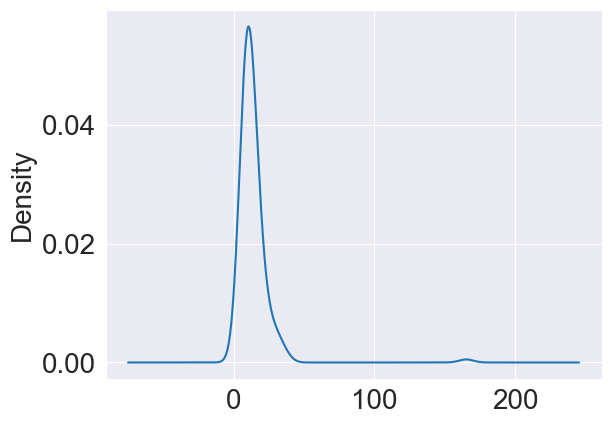

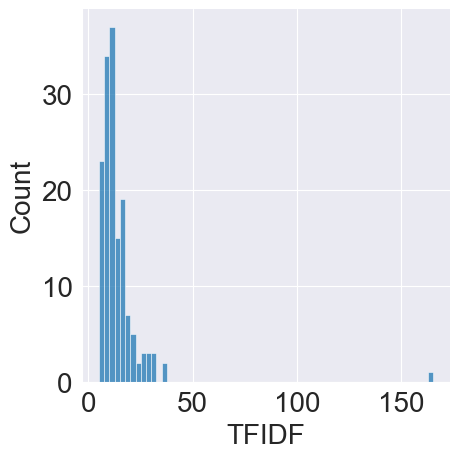

In [173]:
import seaborn
print("Mean is = %f " % np.mean(topTerm['TFIDF']))
print("Standard Deviation is = %f " % np.std(topTerm['TFIDF']))
print("Max is = %f " % np.max(topTerm['TFIDF']))
print("Min is = %f " % np.min(topTerm['TFIDF']))
plt.figure()
u = topTerm['TFIDF'].plot.kde()
u=seaborn.displot(x=topTerm['TFIDF'])

In [174]:
topTerm[topTerm['TFIDF'] > (np.mean(topTerm['TFIDF'])+1.5*np.std(topTerm['TFIDF']))].sort_values(by='TFIDF',ascending=False)

,Words,TFIDF
54,omm,165.410293
43,terms,36.229822
120,bit,35.572732


In [175]:
topTerm[topTerm['TFIDF'] < (np.mean(topTerm['TFIDF'])-np.std(topTerm['TFIDF']))].sort_values(by='TFIDF',ascending=False)

,Words,TFIDF


In [176]:
TF

,past,lisinopril,palpitations,syncope,sarcoidosis,current,prednisone,venous,jugular,showed,...,stating,gasping,prominent,standards,unexertion,kipnick,clearly,tract,restorative,failing
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,1.0,1.0,3.0,NaN,2.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,NaN,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


# True Transcriptions

In [177]:
true['no stop words']

0      missus palmer sixty-two year old female presen...
1      hi doctor rawlins saw missus palmer room six s...
2      presented today shortness breath fatigue sixty...
3      mister leslie pal palmer sixty-two year old ma...
4      good morning missus palmer sixty year old sixt...
                             ...                        
149    two year old male presents emergency departmen...
150    sixty-two year old female presents office toda...
151    missus leslie sixty-two year old female patien...
152    met leslie palmer shes sixty-two year old fema...
153    leslie palmer patient presents shortness breat...
Name: no stop words, Length: 154, dtype: object

In [178]:

u=true['no stop words'].aggregate(''.join)
u=u.apply(lambda x:
         [e for e in x.split()])
TF=u.apply(lambda bag: pd.Series(bag).value_counts())
IDF=np.log(float(len(TF))/TF.count())
TFIDF=TF*IDF
TFIDF=TFIDF.fillna(0.0)
TFIDF
l=TFIDF.sum()
l=l.sort_values(ascending=False)
print(np.mean(l), np.std(l),len(l))
f=l.iloc[0:50]
e=l.iloc[50:]
#print(f)
#print(l.iloc[700:])
plt.figure(figsize=(20, 20), dpi=80)

#plt.hist(l,data=1 bins=np.arange(l.min(), l.max()+1))
topTerm=pd.DataFrame({'Words': TFIDF.idxmax(axis=1),'TFIDF':TFIDF.max(axis=1)},columns=['Words','TFIDF'])
topTerm=topTerm.sort_values(by="TFIDF",ascending=False)
#topTerm
#f
#e
ld = pd.DataFrame(data=l).reset_index()
ld

22.315481081105712 23.107296428122872 2770


,index,0
0,patient,193.044284
1,some,164.956407
2,sarcoidosis,153.819787
3,would,144.512298
4,terms,141.475821
...,...,...
2765,infiltrative,5.036953
2766,asymm,5.036953
2767,processed,5.036953
2768,process,5.036953


<Figure size 1600x1600 with 0 Axes>

In [179]:
topTerm

,Words,TFIDF
43,terms,35.968429
34,mgs,34.750443
44,far,31.701094
17,terms,31.172639
20,mgs,30.406638
...,...,...
113,qtwelve,5.036953
108,definitive,5.036953
67,plenty,5.036953
49,benefit,5.036953


Mean is = 11.211227 
Standard Deviation is = 5.959980 
Max is = 35.968429 
Min is = 5.036953 


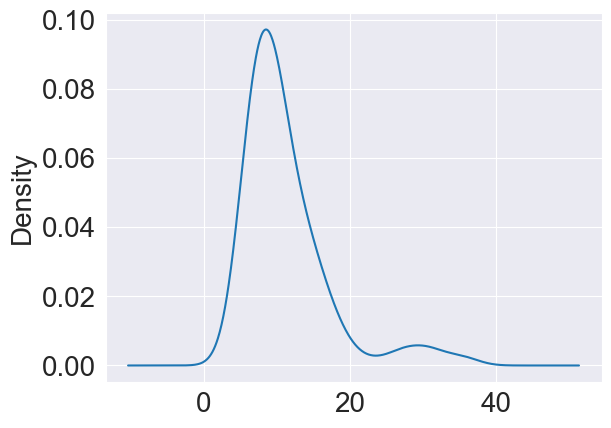

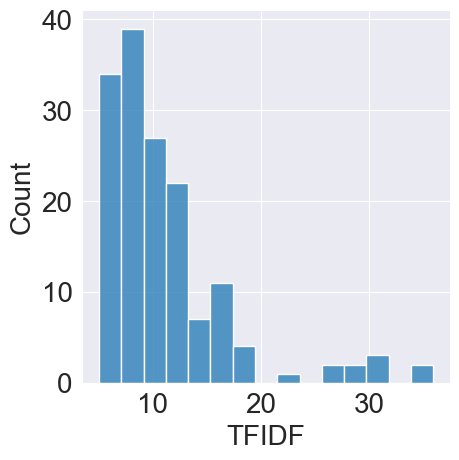

In [180]:
import seaborn
print("Mean is = %f " % np.mean(topTerm['TFIDF']))
print("Standard Deviation is = %f " % np.std(topTerm['TFIDF']))
print("Max is = %f " % np.max(topTerm['TFIDF']))
print("Min is = %f " % np.min(topTerm['TFIDF']))
plt.figure()
u = topTerm['TFIDF'].plot.kde()
u=seaborn.displot(x=topTerm['TFIDF'])

In [181]:
topTerm[topTerm['TFIDF'] > (np.mean(topTerm['TFIDF'])+1.5*np.std(topTerm['TFIDF']))].sort_values(by='TFIDF',ascending=False)

,Words,TFIDF
43,terms,35.968429
34,mgs,34.750443
44,far,31.701094
17,terms,31.172639
20,mgs,30.406638
130,noted,29.068673
147,id,27.819382
97,decided,27.192036
140,regards,25.961545
121,far,22.643639


In [182]:
topTerm[topTerm['TFIDF'] < (np.mean(topTerm['TFIDF'])-np.std(topTerm['TFIDF']))].sort_values(by='TFIDF',ascending=False)

,Words,TFIDF
141,ambulation,5.036953
139,global,5.036953
113,qtwelve,5.036953
108,definitive,5.036953
67,plenty,5.036953
49,benefit,5.036953
0,infiltrated,5.036953


<Figure size 1600x1600 with 0 Axes>

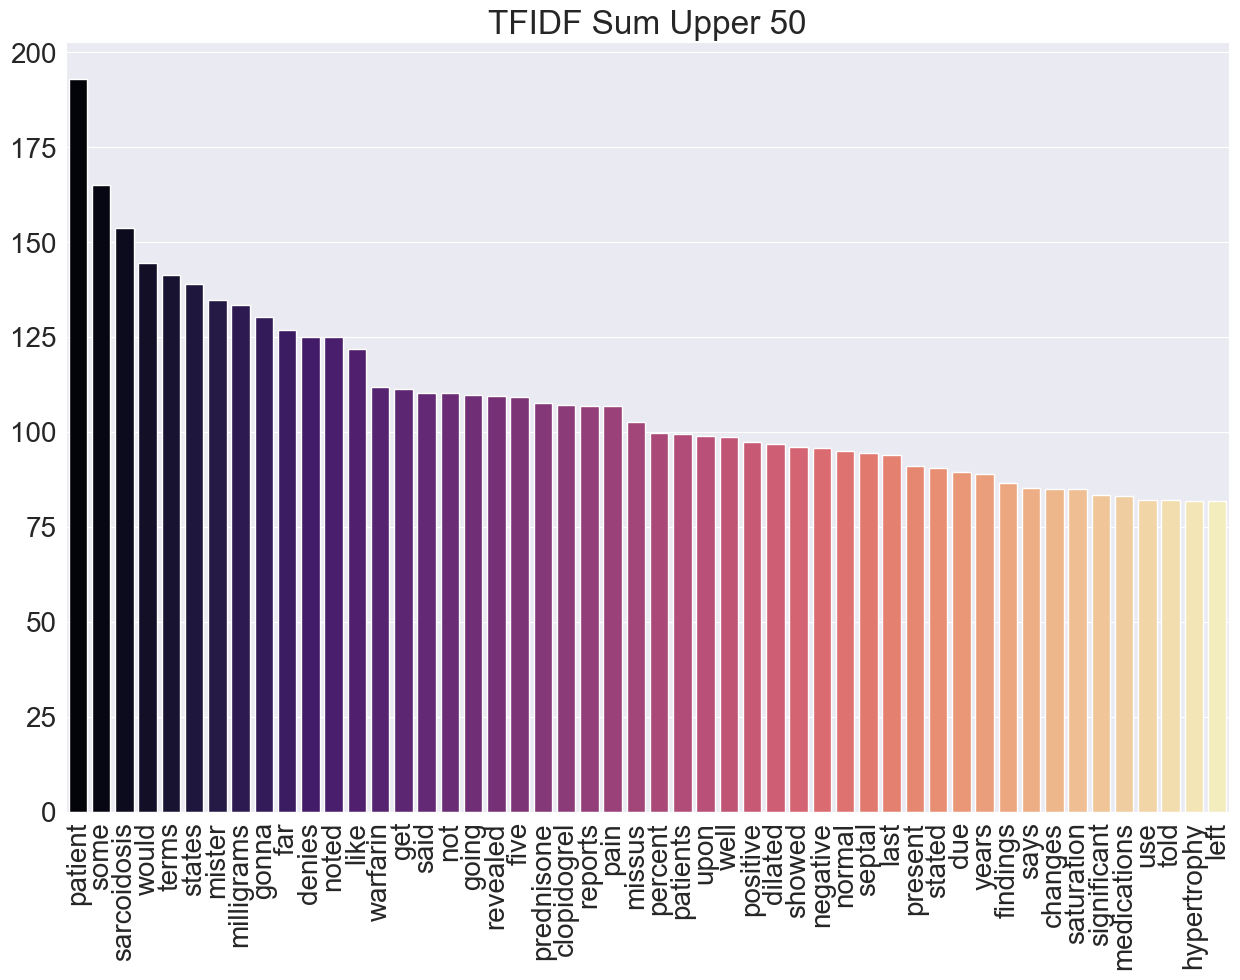

In [183]:
plt.figure(figsize=(20, 20), dpi=80)

fig, ax = plt.subplots(figsize=(15,10))
## Setting plot to horizontal for easy viewing + setting title + display 
seaborn.color_palette("flare", as_cmap=True)
#print(f)
#print(e)
bar_plot = seaborn.barplot(x=f.index, y=f.values, palette='magma',ax=ax)
plt.xticks(rotation=90);
plt.title('TFIDF Sum Upper 50')

plt.show();

In [184]:
len(l)

2770

<Figure size 1600x1600 with 0 Axes>

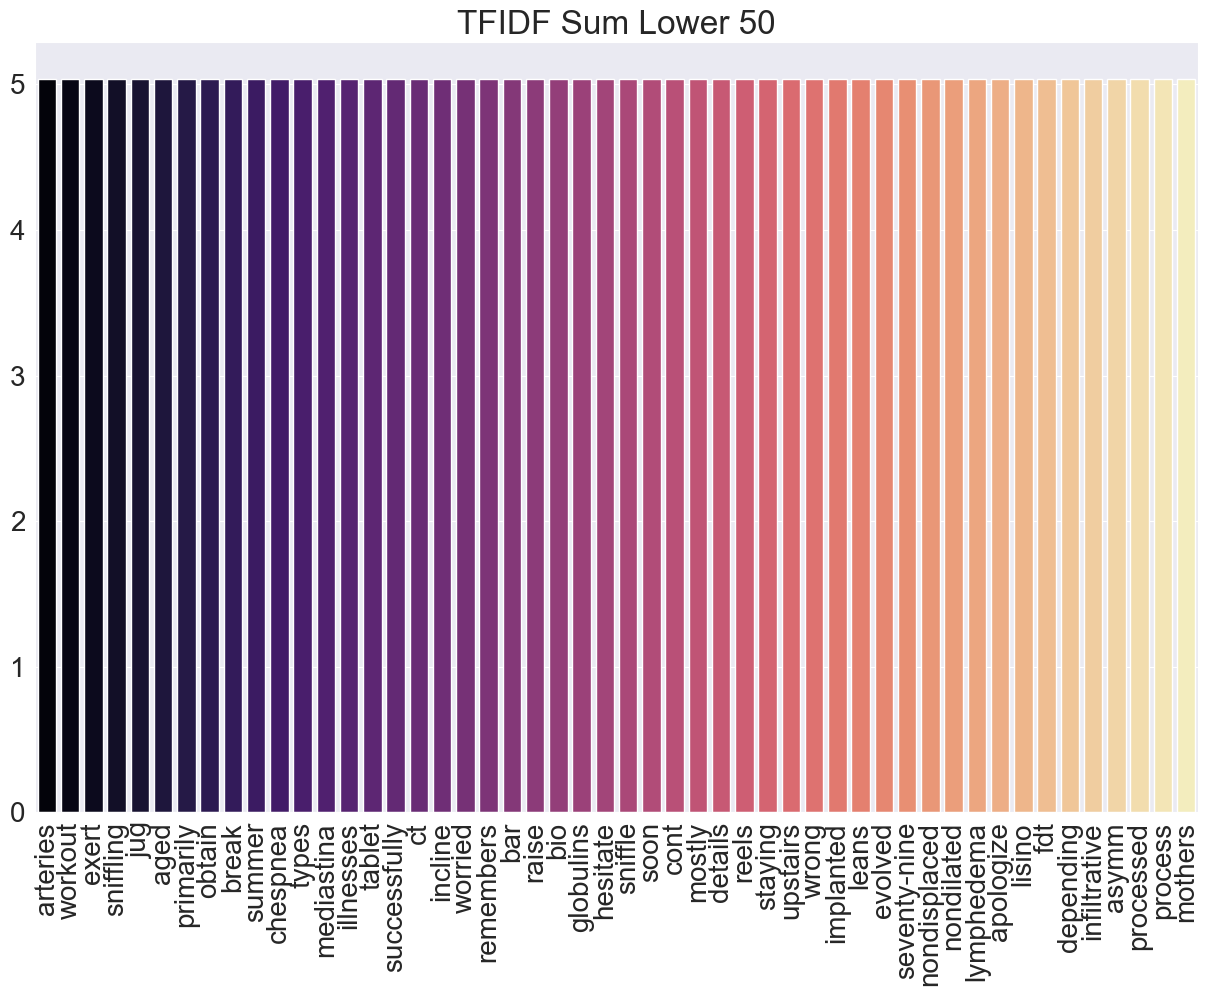

In [190]:
plt.figure(figsize=(20, 20), dpi=80)

fig, ax = plt.subplots(figsize=(15,10))
## Setting plot to horizontal for easy viewing + setting title + display 
seaborn.color_palette("flare", as_cmap=True)
#print(f)
#print(e)
e=l[2720:,]
bar_plot = seaborn.barplot(x=e.index, y=e.values, palette='magma',ax=ax)
plt.xticks(rotation=90);
plt.title('TFIDF Sum Lower 50')

plt.show();

In [191]:
e=l[2720:,]
e

arteries        5.036953
workout         5.036953
exert           5.036953
sniffling       5.036953
jug             5.036953
aged            5.036953
primarily       5.036953
obtain          5.036953
break           5.036953
summer          5.036953
chespnea        5.036953
types           5.036953
mediastina      5.036953
illnesses       5.036953
tablet          5.036953
successfully    5.036953
ct              5.036953
incline         5.036953
worried         5.036953
remembers       5.036953
bar             5.036953
raise           5.036953
bio             5.036953
globulins       5.036953
hesitate        5.036953
sniffle         5.036953
soon            5.036953
cont            5.036953
mostly          5.036953
details         5.036953
reels           5.036953
staying         5.036953
upstairs        5.036953
wrong           5.036953
implanted       5.036953
leans           5.036953
evolved         5.036953
seventy-nine    5.036953
nondisplaced    5.036953
nondilated      5.036953


In [192]:
file_name=pd.read_csv("True Text .csv", header=0, usecols=['File Name'])
file_name

,File Name
0,Student 001.mp3
1,Student 002.mp3
2,Student 003.mp3
3,Student 004.mp3
4,Student 005.mp3
...,...
149,Student 150.mp3
150,Student 151.mp3
151,Student 152.mp3
152,Student 153.mp3


In [201]:

final = pd.concat([file_name,true['all text'],nova['all text'],whisper['all text']],axis=1)
final.columns = ['file name', 'true','nova','whisper']

In [202]:
final

,file name,true,nova,whisper
0,Student 001.mp3,missus palmer is a sixty-two year old female p...,missus palmer is a sixty-two year old female p...,missus palmer is a sixty-two year old female p...
1,Student 002.mp3,hi doctor rawlins i just saw missus palmer in ...,hi doctor rawlins i just saw missus palmer in ...,hi doctor rawlins i just saw missus palmer in ...
2,Student 003.mp3,presented today with shortness of breath and f...,today with shortness of breath and fatigue she...,she is sixty-two years old and presented to th...
3,Student 004.mp3,mister leslie pal palmer who is a sixty-two ye...,mister leslie palmer who is a sixty-two year o...,mister leslie palmer who is a sixty-two year o...
4,Student 005.mp3,good morning missus palmer is a sixty year old...,good morning missus palmer is a sixty year old...,good morning missus palmer is a sixty-two year...
...,...,...,...,...
149,Student 150.mp3,two year old male presents to the emergency de...,two year old male presents to the emergency de...,year old male presents to the emergency depart...
150,Student 151.mp3,she is a sixty-two year old female who present...,she is a sixty-two year old female who present...,she is a sixty-two year old female who present...
151,Student 152.mp3,missus leslie is a sixty-two year old female p...,missus leslie is a sixty-two year old female p...,missus leslie is a sixty-two year old female p...
152,Student 153.mp3,so i just met with leslie palmer shes a sixty-...,so i just met with leslie palmer she is a sixt...,so i just met with leslie palmer she is a sixt...


In [203]:
final.to_excel('Final Transcriptions.xlsx', engine='xlsxwriter',sheet_name='Textual Responses')